Dataset Shape: (297, 14)
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  

📌 Logistic Regression Results
Accuracy: 0.9166666666666666
AUC: 0.953125
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        32
           1       1.00      0.82      0.90        28

    accuracy                           0.92        60
   macro avg       0.93      0.91      0.91   

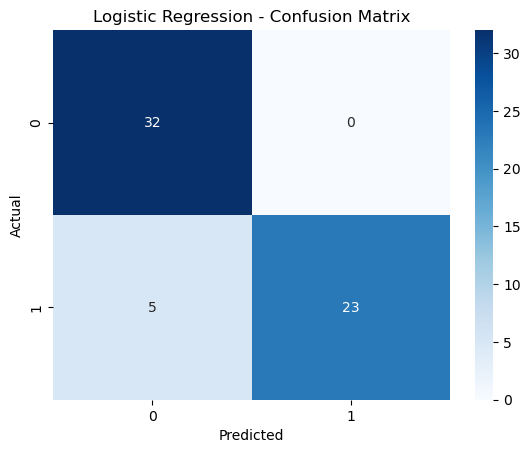


📌 Random Forest Results
Accuracy: 0.8833333333333333
AUC: 0.9447544642857144
              precision    recall  f1-score   support

           0       0.84      0.97      0.90        32
           1       0.96      0.79      0.86        28

    accuracy                           0.88        60
   macro avg       0.90      0.88      0.88        60
weighted avg       0.89      0.88      0.88        60



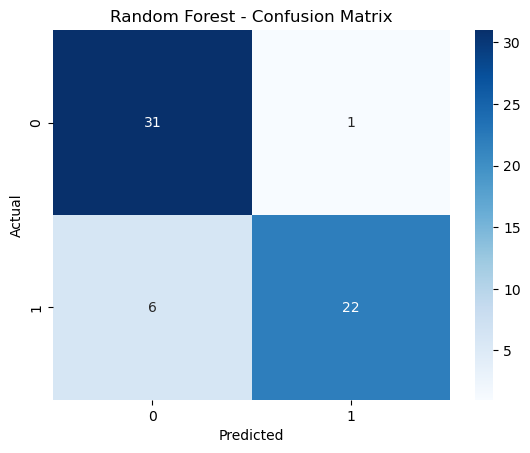

C:\Users\User\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:10:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



📌 XGBoost Results
Accuracy: 0.85
AUC: 0.9441964285714286
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        32
           1       0.88      0.79      0.83        28

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



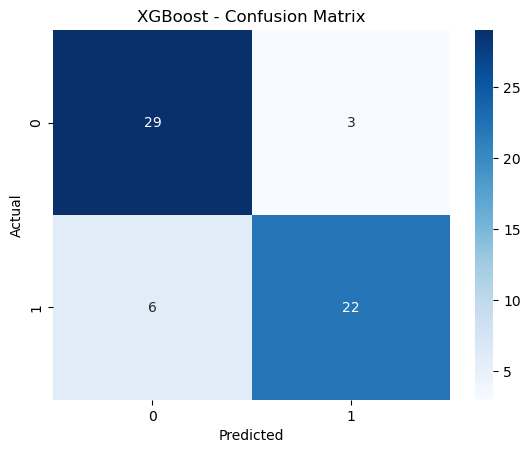


Model Comparison:
           Logistic Regression  Random Forest   XGBoost
Accuracy             0.916667       0.883333  0.850000
AUC                  0.953125       0.944754  0.944196

✅ Best Model: Logistic Regression with 91.67% accuracy


['scaler1.pkl']

In [1]:
"""
📌 Heart Disease Prediction using Machine Learning
"""

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# ------------------------------------------------------

# Step 2: Load Dataset
data = pd.read_csv("heart_cleveland_upload.csv")   # <-- apni dataset file ka naam daalein
print("Dataset Shape:", data.shape)
print(data.head())

# ------------------------------------------------------

# Step 3: Data Preprocessing
# Encode categorical columns
# Correct column names based on the provided dataset
categorical_cols = ["sex", "cp", "fbs", "restecg", "exang", "slope", "thal"]


for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# Split dataset
X = data.drop("condition", axis=1) # Target column name is 'condition'
y = data["condition"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ------------------------------------------------------

# Step 4: Model Training
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss")
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

    results[name] = {"Accuracy": acc, "AUC": auc}

    print(f"\n📌 {name} Results")
    print("Accuracy:", acc)
    print("AUC:", auc)
    print(classification_report(y_test, y_pred))

    # Confusion Matrix Visualization
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# ------------------------------------------------------

# Step 5: Compare Models
print("\nModel Comparison:\n", pd.DataFrame(results))

best_model = max(results, key=lambda x: results[x]["Accuracy"])
print(f"\n✅ Best Model: {best_model} with {results[best_model]['Accuracy']*100:.2f}% accuracy")

# Save best model
joblib.dump(models[best_model], "heart_model1.pkl")
joblib.dump(scaler, "scaler1.pkl")